# COMP3211 Assignment1:

### Contact TA:
Cheng JIN, cjinag@cse.ust.hk
Yubo Wang, ywangnx@cse.ust.hk
Yingji Zhong, yingji.zhong@connect.ust.hk

You need to install the matplotlib package in advance, try this command:
`
pip3 install matplotlib
`
or
`
conda install matplotlib
`

In [31]:
import torch
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
import csv
import random

In [34]:
def setup_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    np.random.seed(seed)
    random.seed(seed)
    torch.backends.cudnn.deterministic = True


def AccuarcyCompute(pred: torch.Tensor, label: torch.Tensor):
    pred = pred.cpu().data.numpy()
    label = label.cpu().data.numpy()
    test_np = (np.argmax(pred, 1) == label)
    test_np = np.float32(test_np)
    return np.mean(test_np)


def plot_fig(Y: list, title: str, dir: str, X=None, x_label=None):
    if X is None:
        plt.plot(Y)
    else:
        plt.plot(X, Y)
    if 'train' in title or 'loss' in title:
        plt.ylabel('loss')
    else:
        plt.ylabel('accuracy')
    if x_label:
        plt.xlabel(x_label)
    else:
        plt.xlabel('epoch')
    plt.title(title)
    plt.savefig(dir)
    plt.show()


def plot_decision_boundary(dataset_test, labels, labels_predicted, layer_num=None, title=None, color_map='coolwarm',
    name='2_moon_decision_boundary_'):
    dataset = dataset_test.detach().cpu().numpy()
    color_map = plt.get_cmap(color_map)
    xmin, xmax = dataset[:, 0].min() - 1, dataset[:, 0].max() + 1
    ymin, ymax = dataset[:, 1].min() - 1, dataset[:, 1].max() + 1
    x_span = np.linspace(xmin, xmax, int(dataset.shape[0] / 10))
    y_span = np.linspace(ymin, ymax, 10)
    xx, yy = np.meshgrid(x_span, y_span)
    temp = []
    for k in range(10):
        for j in range(int(dataset.shape[0]/10)-1, -1, -1):
            for all in range(dataset.shape[0]):
                if y_span[k] <= dataset[all,1] <= y_span[k+1]:
                    if x_span[j] <= dataset[all,0] <= x_span[j+1]:
                        temp.append(labels_predicted[all])
    labels_predicted=np.array(temp)
    z = labels_predicted.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=color_map, alpha=0.5)
    ax.scatter(dataset[:, 0], dataset[:, 1], c=labels, cmap=color_map)
    plt.xlabel('feature 1')
    plt.ylabel('feature 2')
    if layer_num:
        plt.title('2 moon decision boundary with ' + str(layer_num) + ' hidden units')
        plt.savefig(name + str(layer_num) + '.png')
    elif title:
        plt.title(title)
        plt.savefig(title + '.png')
    plt.show()


def load_data(dataset: str):
    path_list = [dataset + '_train.csv', dataset + '_valid.csv', dataset + '_test.csv']
    data_list_total, label_list_total = [], []
    for path in path_list:
        data_list, label_list = [], []
        with open(path, 'r') as file:
            reader = csv.reader(file)
            for idx, row in enumerate(reader):
                data_list.append([float(x) for x in row[:-1]])
                label_list.append(int(row[-1]))
        data_list_total.append(data_list)
        label_list_total.append(label_list)
    return data_list_total, label_list_total


## Problem 2: 2 moon

In [35]:
setup_seed(3211)

data_list, label_list = load_data('2_moon')
train_data = data_list[0]
train_label = label_list[0]
valid_data = data_list[1]
valid_label = label_list[1]
test_data = data_list[2]
test_label = label_list[2]
train_data.extend(valid_data)
train_label.extend(valid_label)
train_input = torch.tensor(train_data)
train_label = torch.tensor(train_label)
test_input = torch.tensor(test_data)
test_label = torch.tensor(test_label)
#dim(data)=3

In [36]:
train_input.shape, train_label.shape

(torch.Size([800, 2]), torch.Size([800]))

Modify the functions below:

In [37]:
def build_1_layer_mlp(nbr_hidden_unit):
    
    input_size = 2
    output_size = 2
    
    mlp = nn.Sequential(
        nn.Linear(input_size, nbr_hidden_unit),
        nn.ReLU(),
        nn.Linear(nbr_hidden_unit, output_size)
    )
    
    return mlp 




Accuracy :0.5


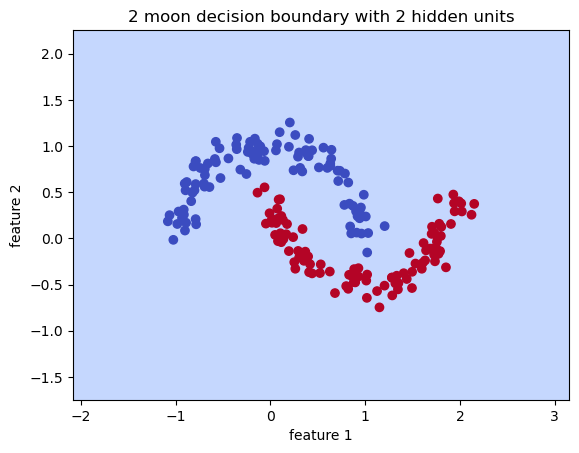

Accuracy :0.19499999284744263


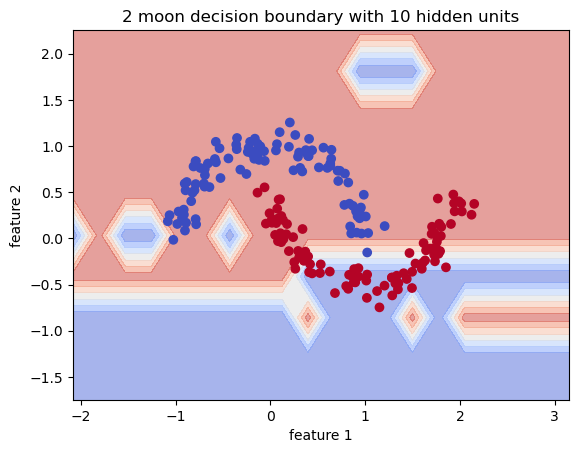

Accuracy :0.7450000047683716


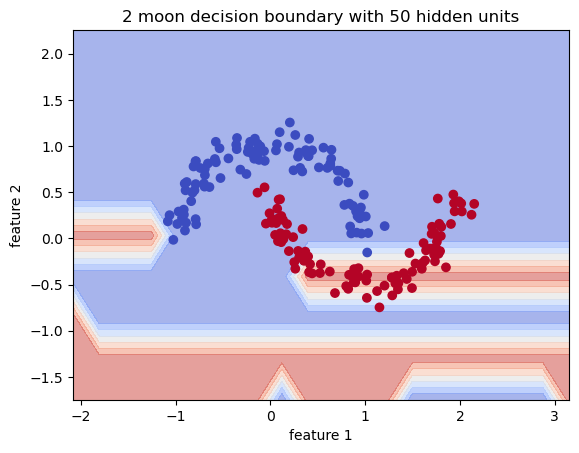

Accuracy :0.800000011920929


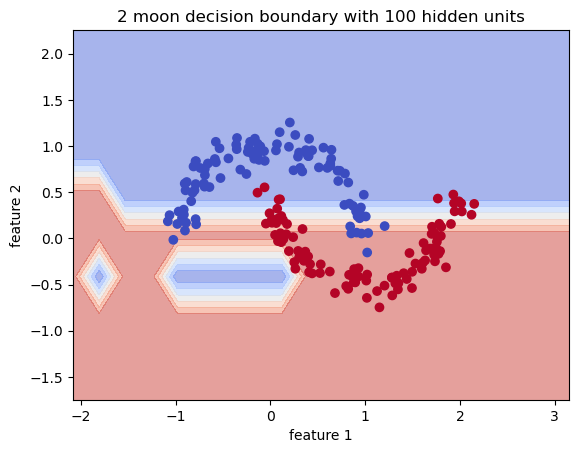

Accuracy :0.8050000071525574


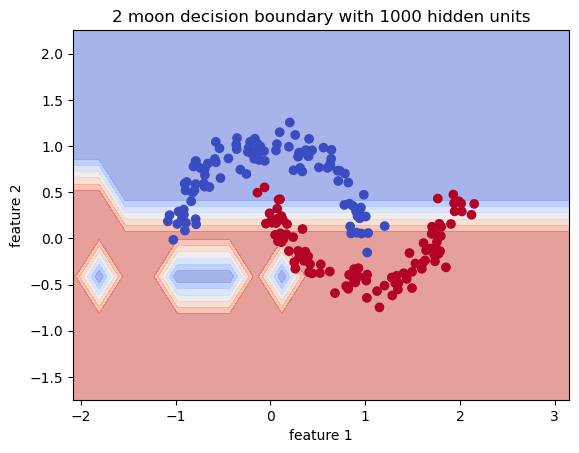

Accuracy :0.9049999713897705


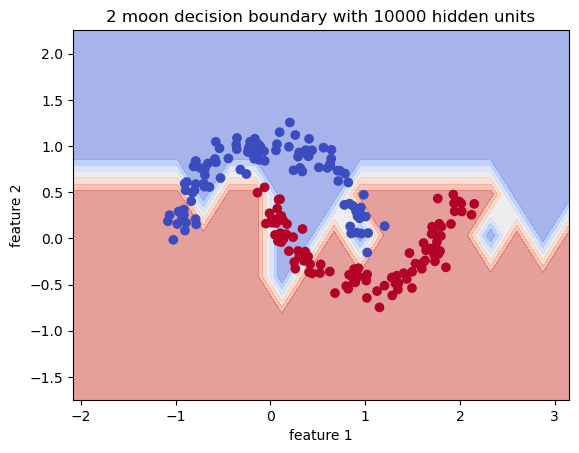

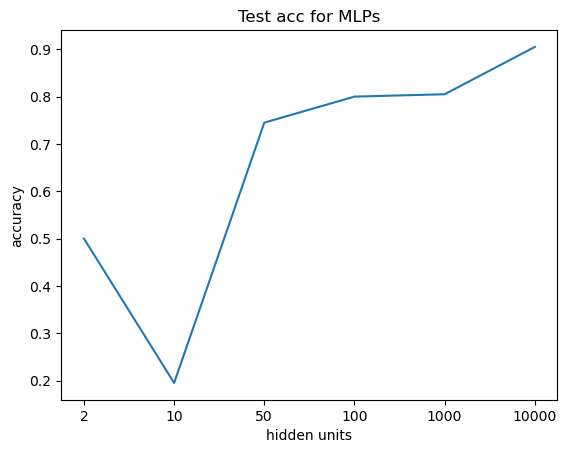

In [38]:
def train_mlp():
    epochs = 30
    loss_list, test_acc = [], []
    lossfunc = torch.nn.CrossEntropyLoss()
    hidden_unit_list = [2, 10, 50, 100, 1000, 10000]
    for hidden_unit in hidden_unit_list:
        mlp = build_1_layer_mlp(hidden_unit)
        optimizer = torch.optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)
        for i_epoch in range(epochs):
            optimizer.zero_grad()
            outputs = mlp(train_input)
            loss = lossfunc(outputs, train_label)
            loss.backward()
            optimizer.step()
        with torch.no_grad():
            test_outputs = mlp(test_input)
            acc = AccuarcyCompute(test_outputs, test_label)
            test_acc.append(acc)
            print('Accuracy :{}'.format(acc))
            predicted_label = np.argmax(test_outputs.cpu().data.numpy(), 1)
        plot_decision_boundary(test_input, test_label, predicted_label, layer_num=hidden_unit)
    plot_fig(test_acc, 'Test acc for MLPs', '2_moon_val_acc.png', [str(i) for i in hidden_unit_list],x_label='hidden units')


train_mlp()

## Problem 3 : Iris

In [74]:
setup_seed(3211)
data_list, label_list = load_data('iris')
train_data = data_list[0]
train_label = label_list[0]
valid_data = data_list[1]
valid_label = label_list[1]
test_data = data_list[2]
test_label = label_list[2]
train_input = torch.tensor(train_data)
train_label = torch.tensor(train_label)
valid_input = torch.tensor(valid_data)
valid_label = torch.tensor(valid_label)
test_input = torch.tensor(test_data)
test_label = torch.tensor(test_label)

In [75]:
def build_mlp():
    
    input_size = 4
    hidden_size1 = 50
    hidden_size2 = 100
    output_size = 3
    
    model = nn.Sequential(
        nn.Linear(input_size, hidden_size1),
        nn.ReLU(),
        nn.Linear(hidden_size1, hidden_size2),
        nn.ReLU(),
        nn.Linear(hidden_size2, output_size)
    )

    return model  
    
mlp = build_mlp()

Accuracy :0.9333333373069763


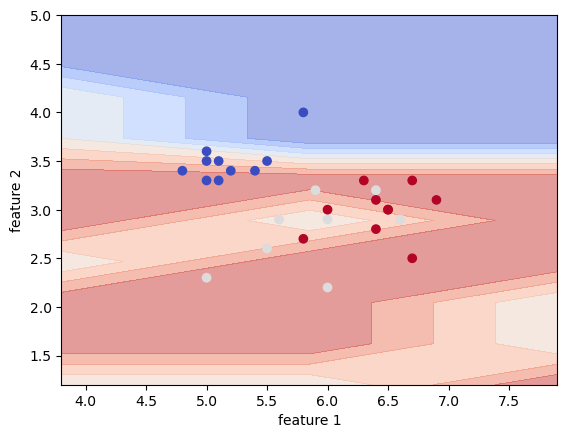

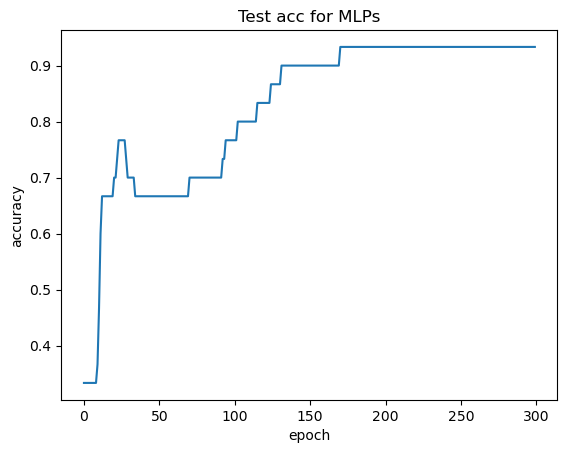

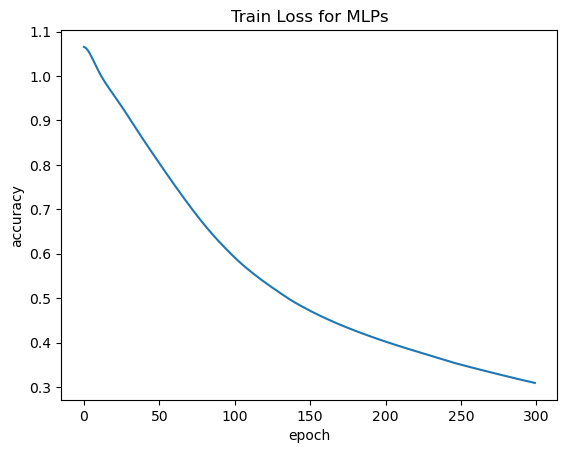

In [95]:
def train_mlp():
      
    epochs = 300 
    train_loss_list, train_accuracy_list = [],[]
    loss_function = torch.nn.CrossEntropyLoss()
   
    mlp = build_mlp()
    optimizer = torch.optim.SGD(mlp.parameters(), lr=0.001, momentum=0.9)
    for epoch in range(epochs):
            optimizer.zero_grad()
            outputs = mlp(train_input)
            loss = loss_function(outputs, train_label)
            loss.backward()
            optimizer.step()
            train_loss_list.append(loss.item())
            with torch.no_grad():
                    test_outputs = mlp(test_input)
                    acc = AccuarcyCompute(test_outputs, test_label)
                    train_accuracy_list.append(acc)
    print('Accuracy :{}'.format(acc))
    predicted_label = np.argmax(test_outputs.cpu().data.numpy(), 1)        
    plot_decision_boundary(test_input, test_label, predicted_label)
    plot_fig(train_accuracy_list, 'Test acc for MLPs', 'iris_val_acc.png', range(epochs))
    plot_fig(train_loss_list, 'Train Loss for MLPs','iris_train_loss_{}.png', range(epochs))

            
        
train_mlp()